In [37]:

import pandas as pd

In [38]:
data = pd.read_csv('meg_mci.csv')

In [39]:
data.head(5)

,id,class,sync_1_2.mean,sync_1_3.mean,sync_1_4.mean,sync_1_5.mean,sync_1_6.mean,sync_1_7.mean,sync_1_8.mean,sync_1_9.mean,...,sync_98_100.cov,sync_98_101.cov,sync_98_102.cov,sync_99_100.cov,sync_99_101.cov,sync_99_102.cov,sync_100_101.cov,sync_100_102.cov,sync_101_102.cov,errank
0,10,2,0.16524,0.14092,0.28587,0.30593,0.099007,0.11985,0.081729,0.19688,...,0.18994,0.24426,0.16895,0.112930,0.14741,0.17948,0.103410,0.133580,0.134290,26.845063
1,101,1,0.24350,0.21801,0.33973,0.37038,0.152750,0.19048,0.107900,0.21108,...,0.12983,0.18638,0.14521,0.083891,0.11734,0.16435,0.105470,0.122850,0.107800,33.915705
2,102,1,0.22693,0.23916,0.34658,0.48029,0.156820,0.21248,0.108420,0.21803,...,0.20941,0.19318,0.16983,0.109880,0.12806,0.15621,0.121340,0.113170,0.106190,30.763512
3,103,2,0.20167,0.21468,0.31721,0.36042,0.139720,0.17884,0.107090,0.22455,...,0.17802,0.21080,0.13883,0.084963,0.15452,0.16742,0.132600,0.144990,0.125710,26.131415
4,104,1,0.17611,0.16305,0.28046,0.31670,0.091437,0.11205,0.077060,0.14538,...,0.11707,0.21940,0.14472,0.078506,0.13249,0.18052,0.078152,0.086651,0.095044,35.038180


In [214]:
data.columns

Index(['id', 'class', 'sync_1_2.mean', 'sync_1_3.mean', 'sync_1_4.mean',
       'sync_1_5.mean', 'sync_1_6.mean', 'sync_1_7.mean', 'sync_1_8.mean',
       'sync_1_9.mean',
       ...
       'sync_98_99.cov', 'sync_98_100.cov', 'sync_98_101.cov',
       'sync_98_102.cov', 'sync_99_100.cov', 'sync_99_101.cov',
       'sync_99_102.cov', 'sync_100_101.cov', 'sync_100_102.cov',
       'sync_101_102.cov'],
      dtype='object', length=25757)

In [40]:
data = data.iloc[:, :-1]

# Example covariances:

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
from scipy.spatial.distance import squareform

In [77]:
data = data.iloc[:, :-3]

In [333]:
cov = data[[c for c in data if 'cov' in c]]

In [334]:
from tqdm import tqdm

In [335]:
from scipy.spatial.distance import squareform

Text(0.5,1,'20')

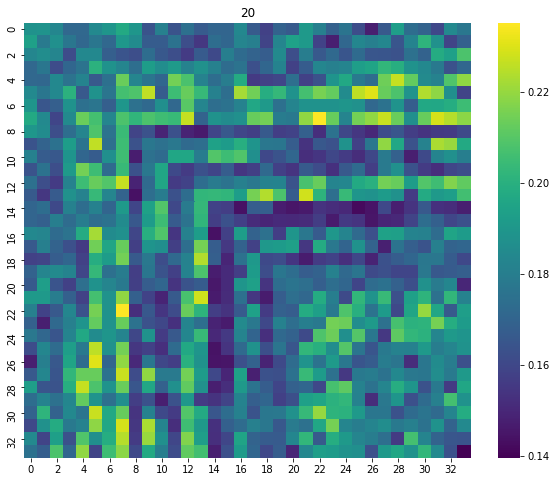

In [412]:
i=20
import skimage.measure
cc = squareform(cov.loc[i]) 
cc[cc==0] = np.mean(np.mean(cc[cc!=0]))
from scipy.ndimage.filters import convolve
kernel = np.ones((3, 3))/9
fig = plt.figure()
conv = convolve(cc, kernel)
mp = skimage.measure.block_reduce(conv, (3, 3), np.median)
sns.heatmap(mp, cmap='viridis')
fig.set_size_inches(10, 8)
ax = plt.gca()
ax.set_title(i)

In [328]:
eigen = pd.DataFrame()
errank = pd.Series()
errankmin = pd.Series()
errankmax = pd.Series()
for i in tqdm(cov.index):
    cc = squareform(cov.loc[i]) 
    cc[cc==0] = np.mean(np.mean(cc[cc!=0]))
    eigen[i] = np.linalg.svd(cc)[1]
    eigen[i] = eigen[i]/eigen[i].abs().sum()
    dens = eigen[i]/eigen[i].abs().sum()
    errankmin.loc[i] = dens.min()
    errankmax.loc[i] = dens.max()
    errank.loc[i] = np.exp(-np.sum(dens*np.log(dens) ))

100%|███████████████████████████████████████| 132/132 [00:01<00:00, 103.60it/s]


In [329]:
from sklearn.feature_selection import mutual_info_classif, f_classif

In [330]:
print(mutual_info_classif(errank.values.reshape(-1, 1), data['class']))
print(f_classif(errank.values.reshape(-1, 1), data['class']))

[0.02284575]
(array([3.52177206]), array([0.06280937]))


In [326]:
print(mutual_info_classif(eigen.max().values.reshape(-1, 1), data['class']))
print(f_classif(eigen.max().values.reshape(-1, 1), data['class']))

[0.02766403]
(array([6.65048327]), array([0.01102573]))


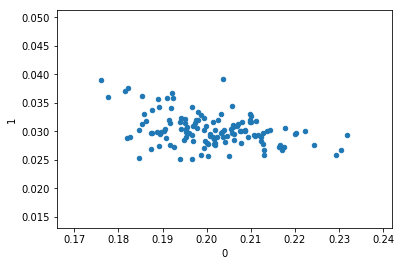

In [195]:
eigen.T.plot.scatter(0, 1)

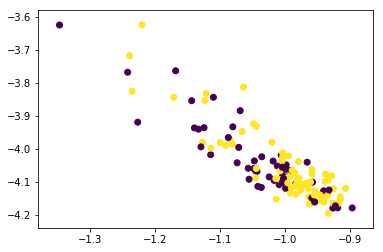

In [231]:
plt.scatter(np.log(eigen.loc[0]), np.log(eigen.iloc[3]), cmap='viridis', c=data['class'])

In [136]:
f_classif(eigen.median().values.reshape(-1, 1), data['class'])

(array([3.25143029]), array([0.07367734]))

In [104]:
import matplotlib.pyplot as plt

In [106]:
import seaborn as sns

In [133]:
f_classif(eigen.rank(axis=1).mean().values.reshape(-1, 1), data['class'])

(array([11.85065919]), array([0.00077589]))

In [132]:
mutual_info_classif(eigen.rank(axis=1).mean().values.reshape(-1, 1), data['class'])

array([0.07316775])

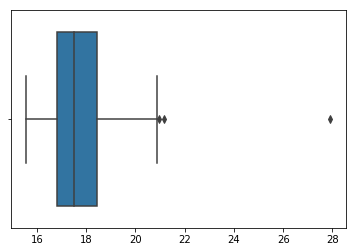

In [95]:
sns.boxplot(eigen.max())

In [55]:
data['errank std'] = errank

In [56]:
data.to_csv('meg_mci.csv', index=False)

In [27]:
from sklearn.feature_selection import f_classif

In [288]:
from sklearn.manifold import TSNE
mds =TSNE(n_components=2, metric="precomputed")

In [289]:
from scipy.spatial.distance import pdist
comps=pd.DataFrame(mds.fit_transform(squareform(pdist(eigvec, 'cosine'))), index=eigvec.index, columns=['C1', 'C2'])

In [290]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(affinity='precomputed')
ap.fit(-squareform(pdist(eigvec, 'cosine')))

AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [291]:
data['APLables'] = ap.labels_

In [293]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(squareform(pdist(eigvec, 'cosine')), method='average')

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [298]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(row_linkage, 8, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

C:\Users\Maria\Anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


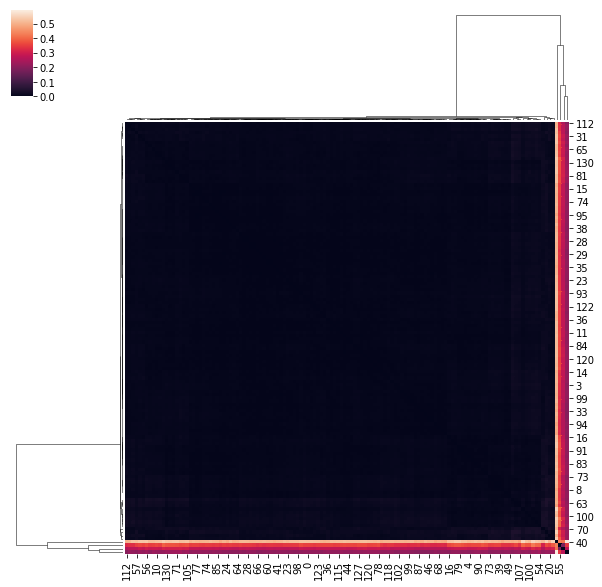

In [296]:
cm = sns.clustermap(pd.DataFrame(squareform(pdist(eigvec, 'cosine')), index=eigvec.index, columns=eigvec.index))

In [297]:
data.loc[cm.dendrogram_col.reordered_ind, 'class']

112    2
1      1
30     2
57     2
31     1
92     1
56     2
124    2
65     2
10     2
101    1
51     1
130    1
37     2
61     2
71     2
81     1
50     2
105    1
117    1
15     1
77     2
86     2
58     1
74     2
47     2
13     2
85     2
95     1
12     2
      ..
4      1
53     2
83     1
90     1
17     1
32     1
73     2
82     1
19     1
39     1
8      1
27     2
49     2
106    1
63     2
107    1
9      2
88     2
100    2
103    1
45     1
54     2
70     1
25     2
20     2
67     2
40     1
55     2
97     2
109    1
Name: class, Length: 132, dtype: int64

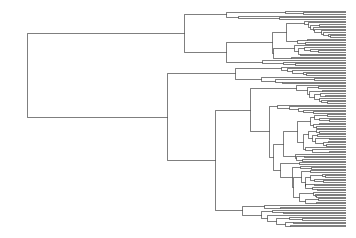

In [258]:
import matplotlib.pyplot as plt
cm.dendrogram_row.plot(ax=plt.gca())

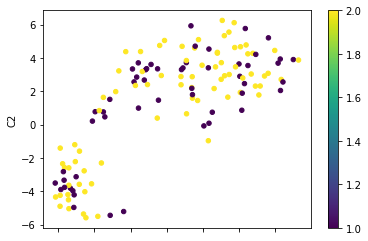

In [208]:
comps.plot.scatter('C1', 'C2', c=data.loc[comps.index, 'class'], cmap='viridis')

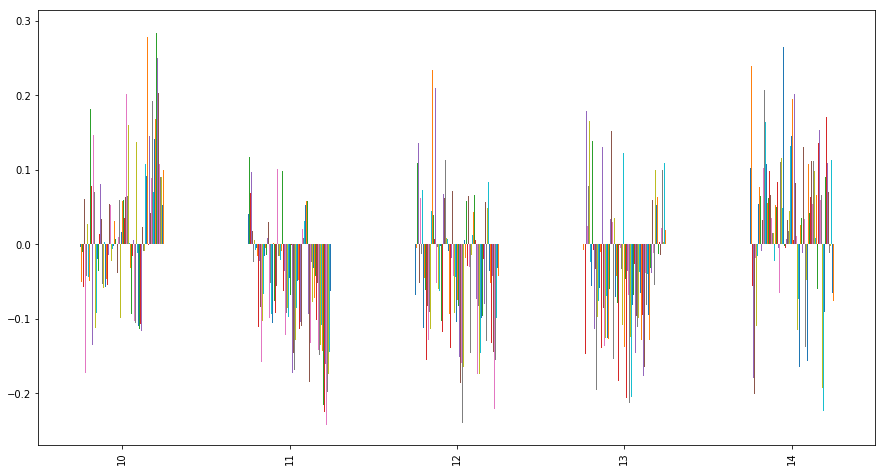

In [197]:
eigvec.iloc[10:15, :].plot.bar(figsize=(15, 8), legend=False)

In [185]:
comps['class'] = data['class']

In [102]:
%matplotlib inline

In [104]:
import seaborn as sns

In [105]:
cc = pd.DataFrame(cc)

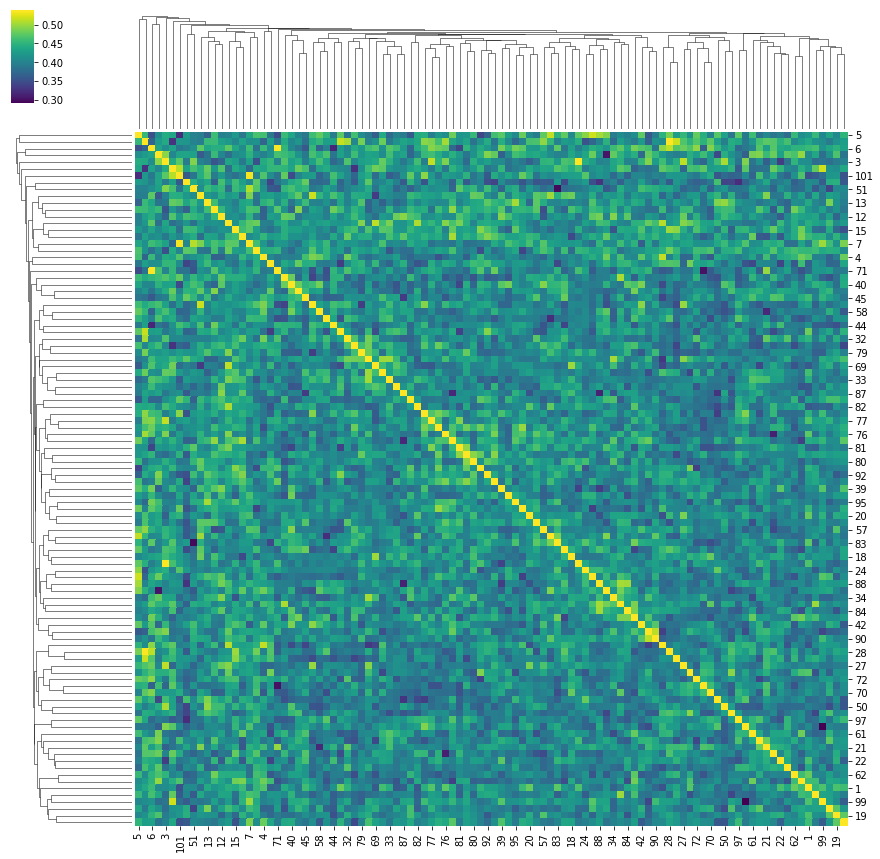

In [106]:
sns.clustermap(np.sqrt(cc), figsize=(15, 15), cmap='viridis')

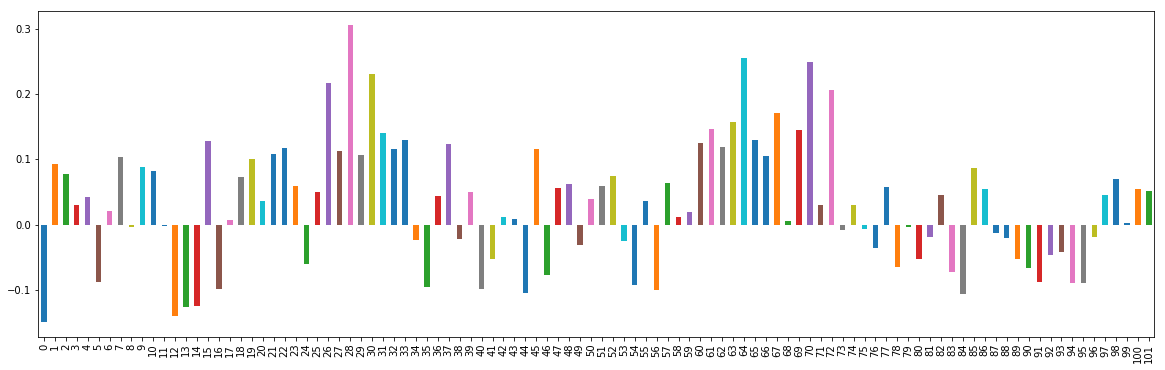

In [107]:
pd.DataFrame(pca.components_.T)[1].plot.bar(figsize=(20, 6))

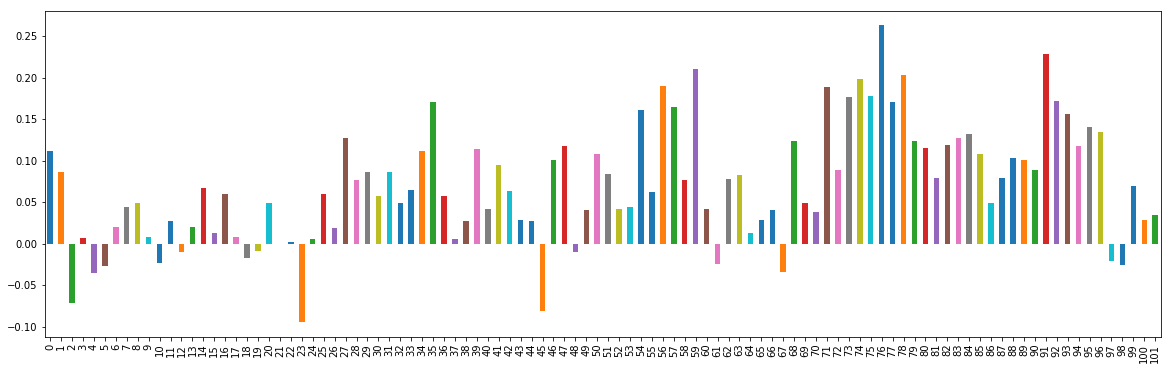

In [108]:
pd.DataFrame(pca.components_.T)[0].plot.bar(figsize=(20, 6))

In [ ]:
for i in range(50):
    cc = squareform(cov.loc[i]) 
    pca.fit((cc))

In [42]:
from scipy.spatial.distance import squareform

In [43]:
covmat = pd.DataFrame(squareform(1-covs.iloc[5].values))

NameError: name 'covs' is not defined

In [45]:
%matplotlib inline

In [46]:
from sklearn.manifold import MDS

In [47]:
mds = MDS(n_components=2, dissimilarity='precomputed')

In [48]:
mani = pd.DataFrame(mds.fit_transform(covmat.values))

NameError: name 'covmat' is not defined

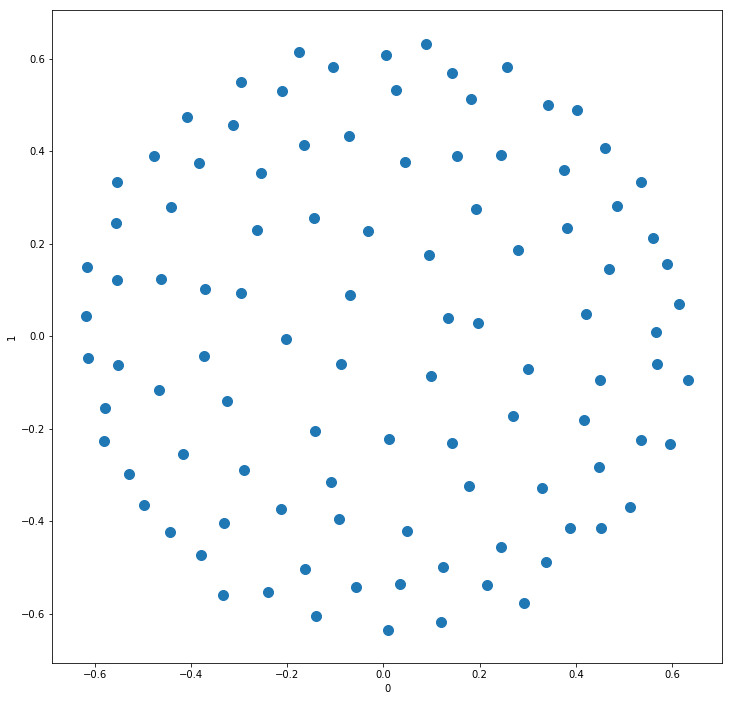

In [84]:
mani.plot.scatter(0, 1, figsize=(12, 12), s=100)

In [87]:
import seaborn as sns

In [122]:
from sklearn.feature_selection import f_classif

In [124]:
y = data['class'].copy()

In [126]:
x = data.iloc[:, 2:]

In [133]:
pvals = pd.Series(f_classif(x, y)[1], index=x.columns)

# Ideas para features con la matrix de covarianza:
1. Los 

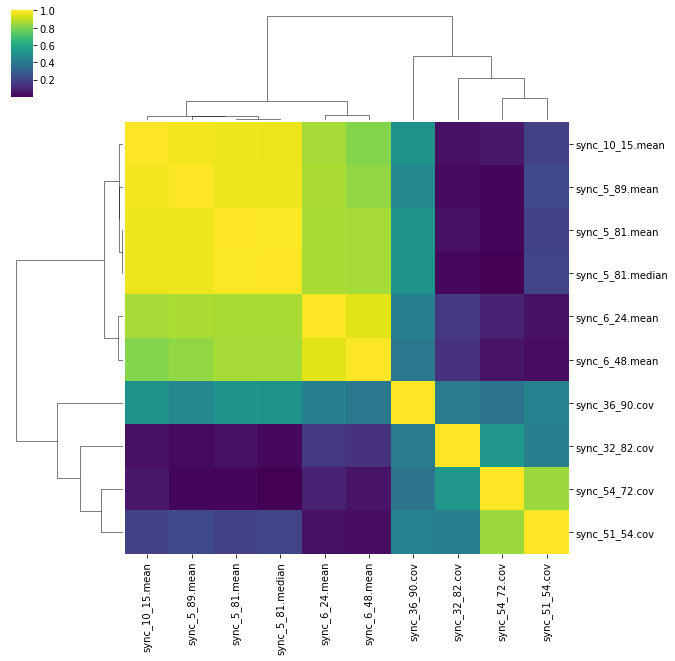

In [147]:
sns.clustermap(top20[pvals.sort_values().index[:10]].corr().abs(), cmap='viridis')

# Approach probabilístico

# Ideas para un frontend chulo:
1. Colocar los nodos siempre en el mismo sitio para ver las diferencias.
2. Simular randomwalks multivariables aleatorios que sigan la misma estructura de covarianza.
3. De algún modo resaltar las señales importantes en el problema